In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

News=pd.read_csv('fake_news_detection_train.csv')

In [3]:
News

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 6 columns]

We have 20800 rows and 6 columns in this dataset.

In [4]:
# Getting datatyoes of the features

News.dtypes

Unnamed: 0     int64
id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

In [5]:
# Getting null values for each feature

News.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

There is a 39 null values in news column.

There is 558 null values in headlines column.

There is 1957 null values in written_by column.



In [6]:
# Getting number of unique values from each feature.

News.nunique()

Unnamed: 0    20800
id            20800
headline      19803
written_by     4201
news          20386
label             2
dtype: int64

In [7]:
# Getting the value conuts of label column

News["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

We can see that there is 10413 fake news and 10387 real news.

# Exploratory data analysis

In [8]:
# getting author name with more fake news

News['written_by'][News['label']==1].value_counts()

admin           193
Pakalert         86
Eddy Lavine      85
Starkman         84
Gillian          82
               ... 
Mike Dan          1
TNB – PA          1
Don               1
Zzz               1
Brad Griffin      1
Name: written_by, Length: 1981, dtype: int64

We can see that admin has  written more fake news followed by pakalert

In [9]:
# getting author name with more real news

News['written_by'][News['label']==0].value_counts()

Pam Key                           242
Jerome Hudson                     166
Charlie Spiering                  141
John Hayward                      140
Katherine Rodriguez               124
                                 ... 
Simon Romero and Andrew Jacobs      1
Mike Isaac and Sydney Ember         1
Adam Popescu                        1
Denise Gellene                      1
Mike Benjamin                       1
Name: written_by, Length: 2225, dtype: int64

We can see that pam key and jerome hudson has written more real news.

# Data pre-processing

In [10]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# lets get the dataset without Nan values in news feature.

News=News[News['news'].notna()]

In [12]:
# Getting null values for each feature

News.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1918
news             0
label            0
dtype: int64

In [13]:
News

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20761 rows x 6 columns]

In [14]:
# getting length of the each News in dataset

News['length'] = News['news'].str.len()
News.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  length  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0    7936  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0    6112  
2  Sunday on ABC’s “This Week,” while discussing ...      0     425  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0    6516  
4    Finian Cunningham has written extensively on...      1    9164

In [15]:
# Convert all News to lower case
News['news'] = News['news'].str.lower()

# Replace email addresses with 'email'
News['news'] = News['news'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
News['news'] = News['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymbols' (£ can by typed with ALT key + 156)
News['news'] = News['news'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
News['news'] = News['news'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
# Replace numbers with 'numbr'
News['news'] = News['news'].str.replace(r'\d+(\.\d+)?', 'numbr')


News['news'] = News['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))



In [16]:
# Removing stopwords from news column in dataset
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','gud',])
News['news'] = News['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))


In [17]:
# Lematization of news feature in dataset
lem=WordNetLemmatizer()
News['news'] = News['news'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [18]:
# length of cleaned comments
News['clean_length'] = News.news .str.len()
News.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  length  \
0  washington — sonny perdue’s telling, georgian ...      0    7936   
1  houston — venezuela plan. tactical approach, d...      0    6112   
2  sunday abc’s “this week,” discussing republica...      0     425   
3  augusta, me. — beleaguered republican governor...      0    6516   
4  finian cunningham written extensively internat...      1    9164   

   clean_length  
0          5846  
1          4463  
2           301  
3          4744  
4          6914

In [19]:
# Total length removal train dataset
print ('Origian Length', News.length.sum())
print ('Clean Length', News.clean_length.sum())

Origian Length 94518924
Clean Length 69447084


We can see the original news length and cleaned news length

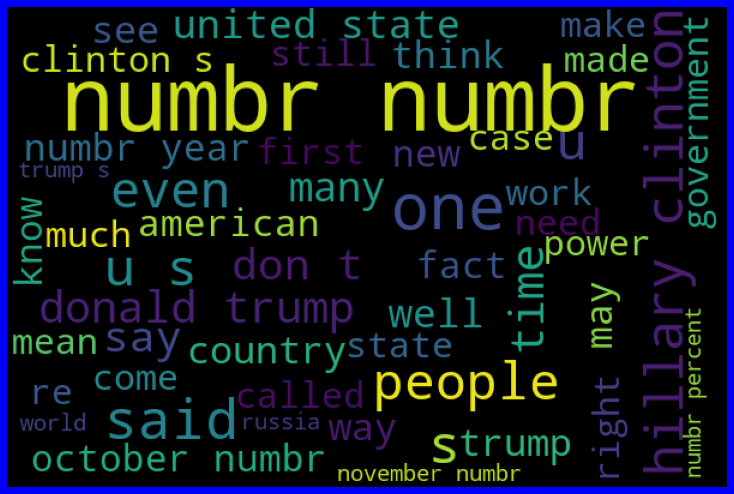

In [21]:
#Getting sense of words in news which are fake news

from wordcloud import WordCloud
fake = News['news'][News['label']==1]
fake_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(fake))
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see most of the fake news contains numbers

In [22]:
#  Convert text into vectors using TF-IDF train dataset
#  Select independent feature from dataset to train the model

from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(News['news'])
X = features


In [26]:
# Selecti dependent feature from dataset

y=News['label']

# Model building

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
# Splitting the dataset to train the model using train test split

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=45,test_size=.30)

In [31]:
# Geeting shape of the train and test data

y_train.shape,y_test.shape,x_train.shape,x_test.shape

((14532,), (6229,), (14532, 10000), (6229, 10000))

In [32]:
# LogisticRegression
LG = LogisticRegression ()

LG.fit(x_train, y_train)
y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9688962290118359
Test accuracy is 0.9442928238882645
[[2932  206]
 [ 141 2950]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3138
           1       0.93      0.95      0.94      3091

    accuracy                           0.94      6229
   macro avg       0.94      0.94      0.94      6229
weighted avg       0.94      0.94      0.94      6229



In [33]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9999311863473713
Test accuracy is 0.8845721624658853
[[2770  368]
 [ 351 2740]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3138
           1       0.88      0.89      0.88      3091

    accuracy                           0.88      6229
   macro avg       0.88      0.88      0.88      6229
weighted avg       0.88      0.88      0.88      6229



In [34]:
#KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.5862923203963666
Test accuracy is 0.5692727564617114
[[ 469 2669]
 [  14 3077]]
              precision    recall  f1-score   support

           0       0.97      0.15      0.26      3138
           1       0.54      1.00      0.70      3091

    accuracy                           0.57      6229
   macro avg       0.75      0.57      0.48      6229
weighted avg       0.75      0.57      0.48      6229



In [35]:
# MultinomialNB
naive=MultinomialNB()

naive.fit(x_train, y_train)
y_pred_train = naive.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = naive.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9152215799614644
Test accuracy is 0.9033552737196981
[[2956  182]
 [ 420 2671]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3138
           1       0.94      0.86      0.90      3091

    accuracy                           0.90      6229
   macro avg       0.91      0.90      0.90      6229
weighted avg       0.91      0.90      0.90      6229



In [47]:
# Support vector classifier
svc=SVC()

svc.fit(x_train, y_train)
y_pred_train = svc.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = svc.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9984172859895403
Test accuracy is 0.9555305827580671
[[2980  158]
 [ 119 2972]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3138
           1       0.95      0.96      0.96      3091

    accuracy                           0.96      6229
   macro avg       0.96      0.96      0.96      6229
weighted avg       0.96      0.96      0.96      6229



# Ensemble 

In [37]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9999311863473713
Test accuracy is 0.9417241932894526
[[2987  151]
 [ 212 2879]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3138
           1       0.95      0.93      0.94      3091

    accuracy                           0.94      6229
   macro avg       0.94      0.94      0.94      6229
weighted avg       0.94      0.94      0.94      6229



In [38]:
#AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9465317919075145
Test accuracy is 0.9332156044308878
[[2904  234]
 [ 182 2909]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3138
           1       0.93      0.94      0.93      3091

    accuracy                           0.93      6229
   macro avg       0.93      0.93      0.93      6229
weighted avg       0.93      0.93      0.93      6229



In [39]:
#GradientBoostingClassifier

grad=GradientBoostingClassifier()
grad.fit(x_train, y_train)
y_pred_train = grad.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = grad.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9346270300027526
Test accuracy is 0.9222989243859367
[[2848  290]
 [ 194 2897]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3138
           1       0.91      0.94      0.92      3091

    accuracy                           0.92      6229
   macro avg       0.92      0.92      0.92      6229
weighted avg       0.92      0.92      0.92      6229



from above all models SVC giving best accuracy and f-1 score.

# Cross-validation

In [46]:
# Croos validation 
cvs=cross_val_score(svc, X, y, cv=3, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

cross validation score : 95.50119515623473
[[2990  148]
 [ 116 2975]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3138
           1       0.95      0.96      0.96      3091

    accuracy                           0.96      6229
   macro avg       0.96      0.96      0.96      6229
weighted avg       0.96      0.96      0.96      6229



it seems there is no underfitting and overfitting.

# Hyper parameter tuning

In [49]:
param_grid = {'C': [0.1,1, 10], 'gamma': ['scale','auto'],'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(),param_grid,cv=2)
grid.fit(x_train,y_train)


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear']})

In [50]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [51]:
# Fitting the model with best parameters

svc=SVC(C=10, gamma='scale', kernel= 'rbf')

svc.fit(x_train, y_train)
y_pred_train = svc.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = svc.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.9999311863473713
Test accuracy is 0.9590624498314336
[[2998  140]
 [ 115 2976]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3138
           1       0.96      0.96      0.96      3091

    accuracy                           0.96      6229
   macro avg       0.96      0.96      0.96      6229
weighted avg       0.96      0.96      0.96      6229



In [53]:
# predicted output

y_pred_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [52]:
# Saving best model

import joblib

joblib.dump(svc,'fake_news_detection.ob')

['fake_news_detection.ob']

In [54]:
# Saving predicted values in CSV file

output=pd.DataFrame(y_pred_test)
output.columns=['Predictions']
output.to_csv('fake_news_dection_predicted_results.csv')